In [19]:
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm

import pickle
from matplotlib import pyplot as plt

## 1. PGD

In [20]:
from Week567_General_Code_Question import LeNet5, pgd, evaluate
from Week567_General_Code_Question import visualize_adv

In [21]:
model = LeNet5()
### 请将Week5保存的lenet5.pt迁移到/model路径下
model.load_state_dict(torch.load('model/lenet5.pt'))
model.eval()

criterion = nn.CrossEntropyLoss()

In [22]:
with open('data/Week567_img_label.pkl', 'rb') as f:
    data = pickle.load(f)
    imgs, labels = data['img'], data['label']

In [23]:
epsilon = 0.2
iter = 20
adv_xs = pgd(imgs, epsilon, iter, model, criterion, labels)
pred_label = evaluate(adv_xs, labels, model)

match rate: 0.0


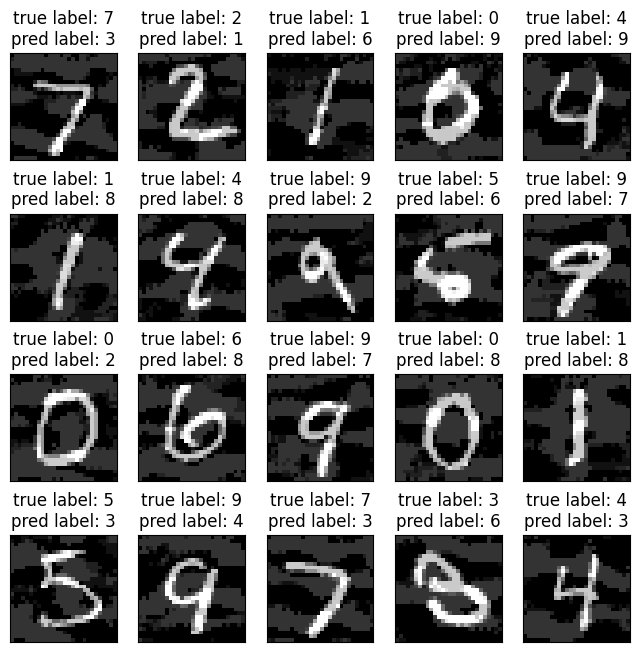

In [24]:
adv_imgs = adv_xs.reshape_as(imgs)
visualize_adv(adv_imgs, labels, pred_label)

In [25]:
with open('data/pgd_img_label.pkl', 'wb') as f:
    pickle.dump({
        'adv_img': adv_imgs,
        'true_label': labels,
        'pred_label': pred_label,
    }, f)

In [26]:
### 请将Week5保存的fgsm_img_label.pkl迁移到/data路径下
with open('data/fgsm_img_label.pkl', 'rb') as f:
    data = pickle.load(f)
    fgsm_imgs = data['adv_img']

In [27]:
# Compute perturbation from original img
delta_fgsm = fgsm_imgs - imgs
delta_pgd = adv_imgs - imgs

# Compute L2 distance
print(f'L2_FGSM: {delta_fgsm.pow(2).sum(dim=-1).sqrt().mean()}')

print(f'L2_PGD: {delta_pgd.pow(2).sum(dim=-1).sqrt().mean()}')

L2_FGSM: 0.571533203125
L2_PGD: 0.6570807099342346
